In [11]:
import os.path

import matplotlib.pyplot as plt
# Imports for ML model

import numpy as np
import tensorflow as tf
import keras
from keras.layers import Normalization


In [13]:
# Loading dataset from folder

directory = keras.utils.image_dataset_from_directory(
   'C:/Users/Filip/Desktop/testPlants'
)

# Filter out corrupted images

num_skipped = 0
for folder_name in ("Apple_Black_rot", "Apple_Cedar_apple_rust", "Apple_healthy", "Apple_Powdery_mildew", "Apple_scab"):
    folder_path = os.path.join("C:/Users/Filip/Desktop/testPlants", folder_name)
    for f_name in os.listdir(folder_path):
        f_path = os.path.join(folder_path, f_name)
        try:
            f_obj = open(f_path, "rb")
            is_jpg = tf.compat.as_bytes("JPG") in f_obj.peek(10)
        finally:
            f_obj.close()
        
        if not is_jpg:
            num_skipped += 1
            # Delete corrupted images
            os.remove(f_path)
            


Found 140 files belonging to 5 classes.


In [14]:
# Generate a Dataset
image_size = (200, 200)
batch_site = 64

train_data, test_data = tf.keras.utils.image_dataset_from_directory(
    "C:/Users/Filip/Desktop/testPlants",
    validation_split= 0.2,
    subset= "both",
    seed= 1337,
    image_size=image_size,
    batch_size=batch_site,
)

Found 140 files belonging to 5 classes.
Using 112 files for training.
Using 28 files for validation.


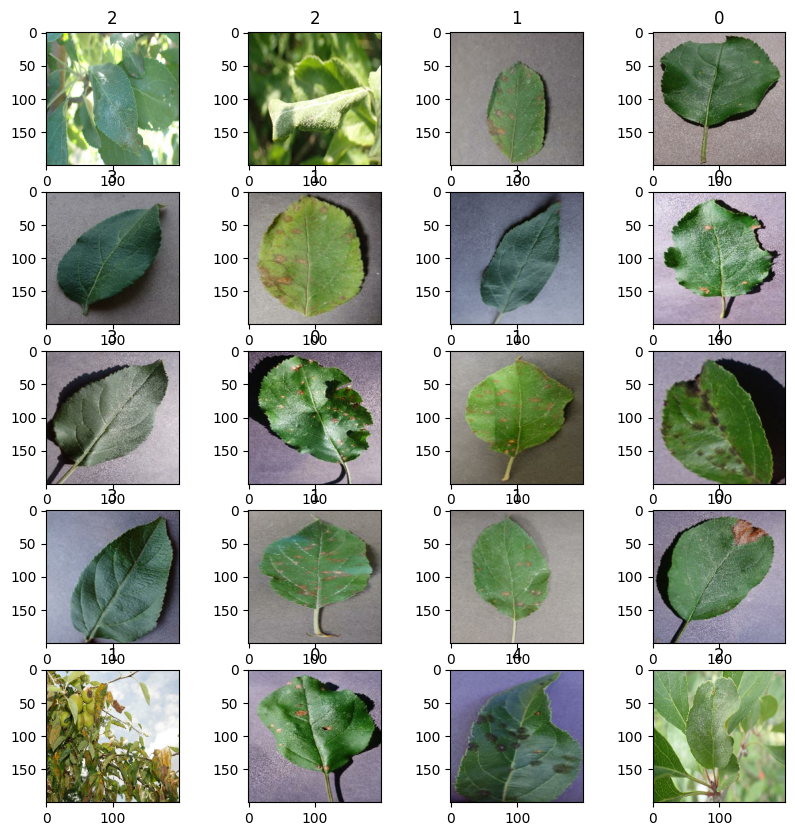

In [19]:
# Visualization of data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images, labels in train_data.take(1):
    for i in range (9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("on")